In [30]:
# Importação de bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [34]:
# Especificar o caminho do dataset
dataset_path = r"C:\Dados\german_credit_risk.csv"  

# Carregar o dataset
df = pd.read_csv(dataset_path, encoding="latin1")  # Ajuste o encoding se necessário

# Mensagem de sucesso e informações do dataset
print("\nDataset carregado com sucesso!") 
print(df.info())



Dataset carregado com sucesso!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB
None


In [35]:
# 2. Pré-processamento dos dados
# Remover coluna desnecessária
df.drop(columns=['Unnamed: 0'], inplace=True)

In [36]:
# Tratar valores ausentes
df.fillna({'Saving accounts': 'unknown', 'Checking account': 'unknown'}, inplace=True)

In [38]:
# Converter variáveis categóricas para numéricas
label_encoders = {}
for column in ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose', 'Risk']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


In [40]:
# Dividir dados em variáveis preditoras (X) e alvo (y)
X = df.drop(columns=['Risk'])  # 'Risk' é a variável alvo
y = df['Risk']

In [42]:
# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# 3. Treinamento de modelos
# Modelo 1: Árvore de Decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [44]:
# Modelo 2: Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [45]:
# 4. Avaliação dos modelos
# Função para exibir métricas
def evaluate_model(model_name, y_test, y_pred):
    print(f"Resultados para {model_name}:")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))
    print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
    print("-" * 50)


In [46]:
# Avaliar modelos
evaluate_model("Árvore de Decisão", y_test, y_pred_dt)
evaluate_model("Random Forest", y_test, y_pred_rf)

Resultados para Árvore de Decisão:
Confusion Matrix:
[[ 29  30]
 [ 39 102]]

Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.49      0.46        59
           1       0.77      0.72      0.75       141

    accuracy                           0.66       200
   macro avg       0.60      0.61      0.60       200
weighted avg       0.67      0.66      0.66       200

Acurácia: 0.66
--------------------------------------------------
Resultados para Random Forest:
Confusion Matrix:
[[ 25  34]
 [ 12 129]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.42      0.52        59
           1       0.79      0.91      0.85       141

    accuracy                           0.77       200
   macro avg       0.73      0.67      0.68       200
weighted avg       0.76      0.77      0.75       200

Acurácia: 0.77
--------------------------------------------------


In [47]:
# 5. Comparação visual (opcional)
import matplotlib.pyplot as plt

# Importâncias das features (Random Forest)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)


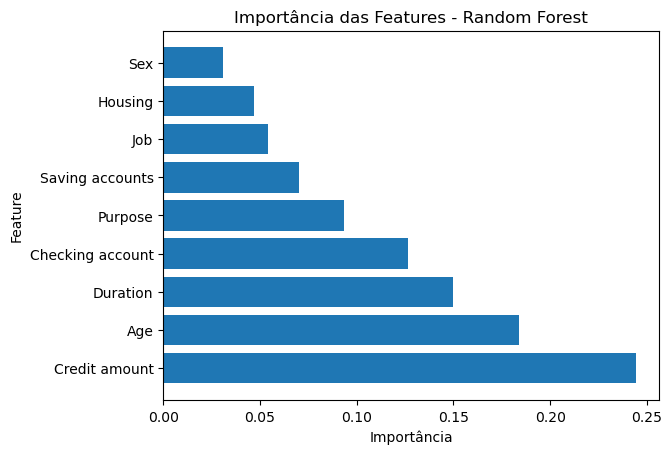

In [49]:
plt.barh(feature_importances['Feature'], feature_importances['Importance'])
plt.xlabel('Importância')
plt.ylabel('Feature')
plt.title('Importância das Features - Random Forest')
plt.show()

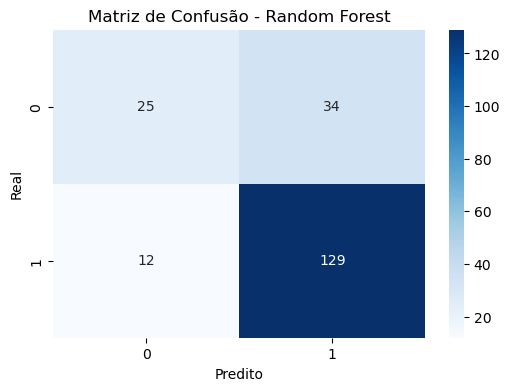

In [50]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Matriz de confusão para o modelo Random Forest
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão - Random Forest')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()


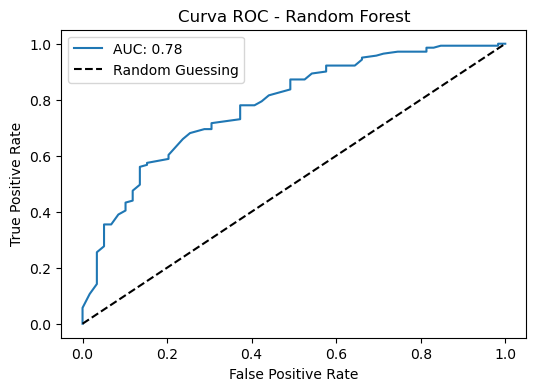

In [51]:
from sklearn.metrics import roc_curve, roc_auc_score

# Probabilidades preditas pelo modelo Random Forest
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_proba_rf)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC: {roc_auc_score(y_test, y_proba_rf):.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend()
plt.show()


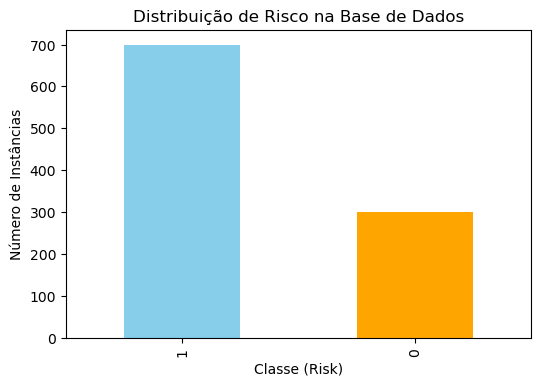

In [52]:
# Distribuição das classes
df['Risk'].value_counts().plot(kind='bar', color=['skyblue', 'orange'], figsize=(6, 4))
plt.title('Distribuição de Risco na Base de Dados')
plt.xlabel('Classe (Risk)')
plt.ylabel('Número de Instâncias')
plt.show()


C:\Users\ellen\AppData\Local\Temp\ipykernel_14528\3281591412.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk', y='Credit amount', palette='viridis')


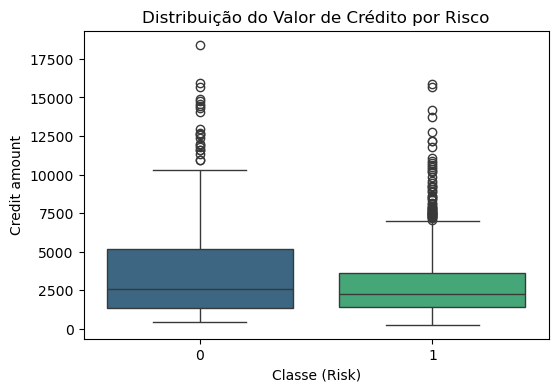

In [53]:
# Boxplot de Credit amount por Risk
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Risk', y='Credit amount', palette='viridis')
plt.title('Distribuição do Valor de Crédito por Risco')
plt.xlabel('Classe (Risk)')
plt.ylabel('Credit amount')
plt.show()


C:\Users\ellen\AppData\Local\Temp\ipykernel_14528\3131273471.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Risk', y='Credit amount', palette='viridis')


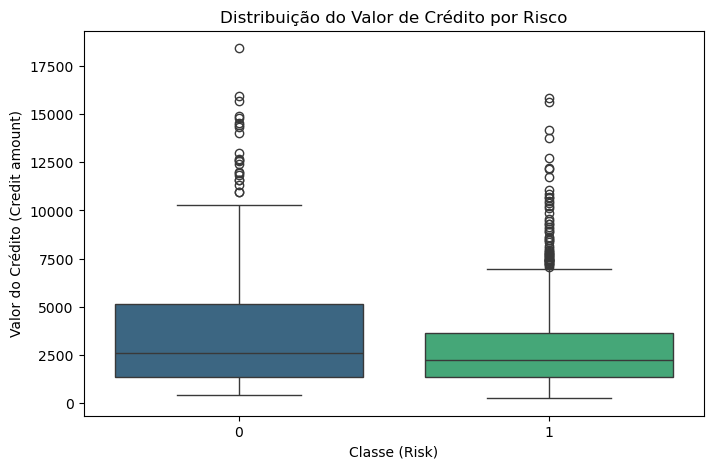

In [55]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Risk', y='Credit amount', palette='viridis')
plt.title('Distribuição do Valor de Crédito por Risco')
plt.xlabel('Classe (Risk)')
plt.ylabel('Valor do Crédito (Credit amount)')
plt.show()


C:\Users\ellen\AppData\Local\Temp\ipykernel_14528\732981472.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Risk'] == 1], x='Credit amount', label='Risco Baixo', shade=True, color='green')
C:\Users\ellen\AppData\Local\Temp\ipykernel_14528\732981472.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=df[df['Risk'] == 0], x='Credit amount', label='Risco Alto', shade=True, color='red')


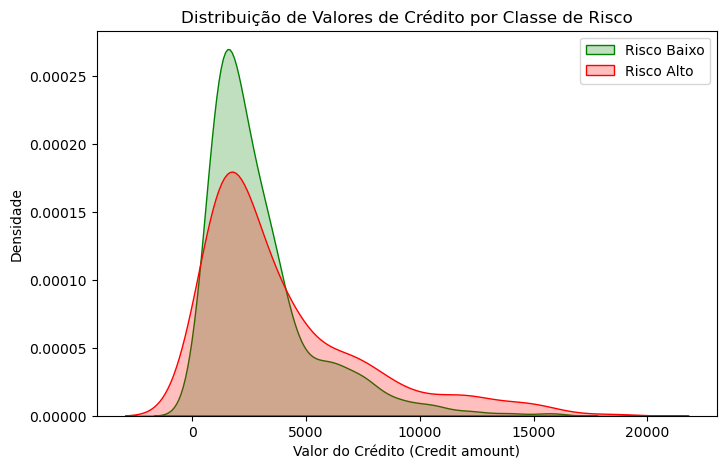

In [56]:
plt.figure(figsize=(8, 5))
sns.kdeplot(data=df[df['Risk'] == 1], x='Credit amount', label='Risco Baixo', shade=True, color='green')
sns.kdeplot(data=df[df['Risk'] == 0], x='Credit amount', label='Risco Alto', shade=True, color='red')
plt.title('Distribuição de Valores de Crédito por Classe de Risco')
plt.xlabel('Valor do Crédito (Credit amount)')
plt.ylabel('Densidade')
plt.legend()
plt.show()


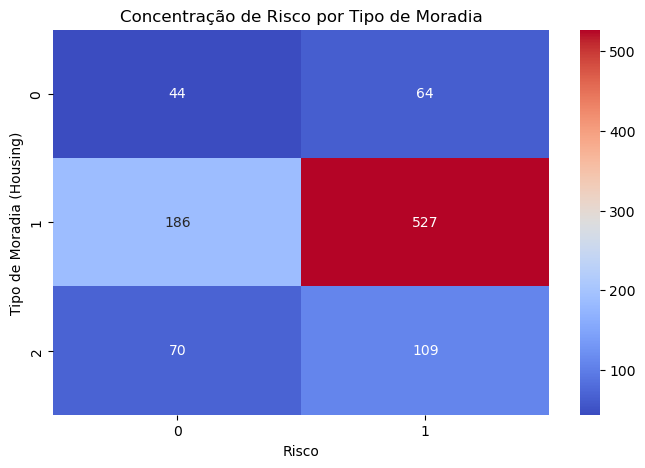

In [57]:
risk_housing = df.groupby(['Housing', 'Risk']).size().unstack()
plt.figure(figsize=(8, 5))
sns.heatmap(risk_housing, annot=True, fmt='d', cmap='coolwarm')
plt.title('Concentração de Risco por Tipo de Moradia')
plt.xlabel('Risco')
plt.ylabel('Tipo de Moradia (Housing)')
plt.show()


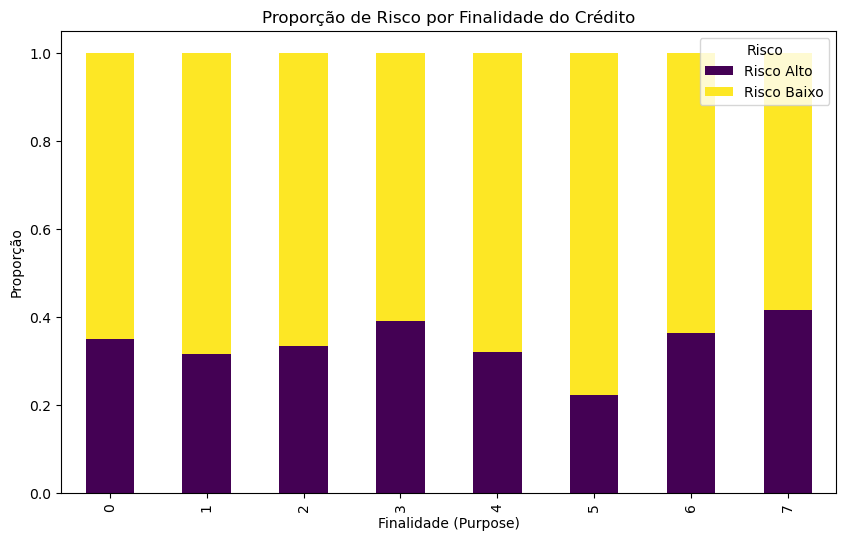

In [63]:
risk_purpose = df.groupby(['Purpose', 'Risk']).size().unstack()
risk_purpose_norm = risk_purpose.div(risk_purpose.sum(axis=1), axis=0)

risk_purpose_norm.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Proporção de Risco por Finalidade do Crédito')
plt.xlabel('Finalidade (Purpose)')
plt.ylabel('Proporção')
plt.legend(['Risco Alto', 'Risco Baixo'], title='Risco')
plt.show()


In [ ]:
# Criar o pairplot
plot = sns.pairplot(df, vars=['Age', 'Credit amount', 'Duration'], hue='Risk', palette='viridis')

# Adicionar o título vertical na lateral direita
plot.fig.text(1.02, 0.5, 'Relação entre Variáveis Numéricas e o Risco', 
              rotation=270, va='center', fontsize=12)

# Exibir o gráfico
plt.show()
